In [1]:
number_of_years=3
number_of_months_per_year=12

number_of_output_files=number_of_years*number_of_months_per_year # output file per month

number_of_datapoints_per_month=30*24

In [2]:
import pandas
pandas.__version__

'0.23.4'

In [3]:
import matplotlib.pyplot as plt
import numpy as np

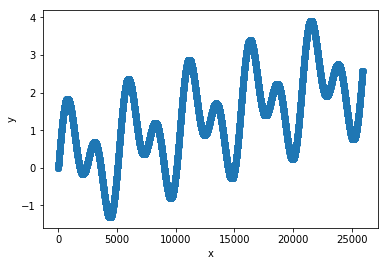

In [4]:
period_count=5 
Fs = number_of_datapoints_per_month*number_of_output_files
x = np.arange(Fs)
y1 = np.sin(2 * np.pi * period_count * x / Fs)
y2 = np.sin(2 * np.pi * period_count * x / (Fs/2))
y=(y1+y2)+0.0001*x
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
df = pandas.DataFrame(y,x)
df.columns=['x']
df.head()

,x
0,0.000000
1,0.003736
2,0.007472
3,0.011208
4,0.014944


In [6]:
list_of_df = np.array_split(df, number_of_output_files)

In [7]:
import datetime
now = datetime.datetime.now()
now.year

2018

In [8]:
indx=0
for year in range(now.year-number_of_years,now.year):
    for month in range(12):
        this_df = list_of_df[indx]
        indx+=1
        writer=pandas.ExcelWriter('example_'+str(year)+'_'+str(month+1)+'.xlsx')
        this_df.to_excel(writer,encoding='utf-8')
        writer.save() 
        writer.close()

In [9]:
import datetime

In [10]:
datetime.datetime.now().strftime('%f') # current_microseconds

'281394'

In [11]:
import numpy
numpy.__version__

'1.15.1'

In [12]:
numpy.corrcoef([x,y])

array([[1.        , 0.50877909],
       [0.50877909, 1.        ]])

In [13]:
polynomial_degree=1
coeffs = numpy.polyfit(x, y, polynomial_degree)
coeffs # ordered from highest degree to lowest

array([7.78951522e-05, 2.86467775e-01])

In [14]:
pol = numpy.poly1d(coeffs)

In [15]:
import sympy
x_symbol = sympy.symbols("x")
poly = sum(sympy.S("{:6.2f}".format(v))*x_symbol**i for i, v in enumerate(coeffs[::-1]))
eq_latex = sympy.printing.latex(poly)

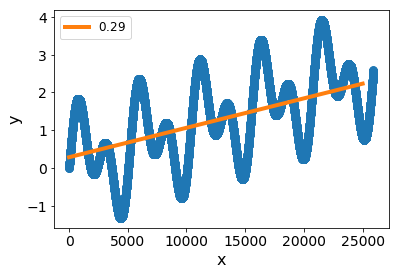

In [16]:
xp = numpy.linspace(0, 25000, 30)
_ = plt.plot(x, y, '.',markersize=15)
_ = plt.plot(xp, pol(xp), '-', label="${}$".format(eq_latex),linewidth=4)
plt.legend(fontsize="large")
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()